# I310D Assignment 7: Data Curation and Analysis

## Step 1: Extraction, Transformation, and Loading

### 1.1: Extraction

I first imported my required libraries: pandas, request, and BeautifulSoup.

In [124]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Next, I entered the url for my selected wikipedia website, then checked for the status code of 200.

In [125]:
wikiurl="https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_annual_scoring_leaders#:~:text=Wilt%20Chamberlain%20holds%20the%20all,in%20the%201961%E2%80%9362%20season."
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


Next, I used used BeautifulSoup to parse the wiki page I selected.
I found everything labelled as "table" in the in wiki's source code, then collected the data from the 0th indexed table. 
I then converted the raw data into a dataframe using pandas, and printed the first few elements of the dataframe to make sure everything worked.

In [126]:
soup = BeautifulSoup(response.text, 'html.parser')

nbatable=soup.find('table',{'class':"wikitable plainrowheaders sortable"})
raw_data=pd.read_html(str(nbatable))
raw_data=pd.DataFrame(raw_data[0])

raw_data.head()

,Season,Player,Age[b],Pos[c],Team,Gamesplayed,Field goalsmade,3-pointfield goalsmade,Free throwsmade,Totalpoints,Points pergame,Ref
0,1946–47,Joe Fulks*,25,F/C,Philadelphia Warriors,60,475,—,439,1389,23.2,[13][14]
1,1947–48,Max Zaslofsky[d],22,G/F,Chicago Stags,48,373,—,261,1007,21.0,[16][17]
2,1948–49,George Mikan*,24,C,Minneapolis Lakers,60,583,—,532,1698,28.3,[18][19]
3,1949–50,George Mikan* (2),25,C,Minneapolis Lakers,68,649,—,567,1865,27.4,[19][20]
4,1950–51,George Mikan* (3),26,C,Minneapolis Lakers,68,678,—,576,1932,28.4,[19][21]


Now that I had checked my raw data, I uploaded it as a CSV to my computer.

In [127]:
raw_data.to_csv("Wiki_NBAScoringLeaders_Raw.csv")

### 1.2: Transformation

The first step for my transformation process was to clean my data.
I removed an unwanted column ("Ref"), then cleaned up the headings for each column before performing a progress check.

In [128]:
final_data = raw_data.drop(["Ref"], axis = 1)


final_data = final_data.rename(columns={"Gamesplayed": "Games Played", "Field goalsmade": "Field Goals Made", "3-pointfield goalsmade": "3-Point Field Goals Made", "Age[b]": "Age","Pos[c]": "Position", "Free throwsmade": "Free Throws Made", "Totalpoints": "Total Points", "Points pergame": "Points per Game"})
final_data.head()

,Season,Player,Age,Position,Team,Games Played,Field Goals Made,3-Point Field Goals Made,Free Throws Made,Total Points,Points per Game
0,1946–47,Joe Fulks*,25,F/C,Philadelphia Warriors,60,475,—,439,1389,23.2
1,1947–48,Max Zaslofsky[d],22,G/F,Chicago Stags,48,373,—,261,1007,21.0
2,1948–49,George Mikan*,24,C,Minneapolis Lakers,60,583,—,532,1698,28.3
3,1949–50,George Mikan* (2),25,C,Minneapolis Lakers,68,649,—,567,1865,27.4
4,1950–51,George Mikan* (3),26,C,Minneapolis Lakers,68,678,—,576,1932,28.4


Next, I checked for duplicates, and found none.

In [129]:
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

 Number of duplicates before : 0


I then did a progress check on my data, and ensured that I had no null entries.

In [130]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season                    76 non-null     object 
 1   Player                    76 non-null     object 
 2   Age                       76 non-null     int64  
 3   Position                  76 non-null     object 
 4   Team                      76 non-null     object 
 5   Games Played              76 non-null     int64  
 6   Field Goals Made          76 non-null     int64  
 7   3-Point Field Goals Made  76 non-null     object 
 8   Free Throws Made          76 non-null     int64  
 9   Total Points              76 non-null     int64  
 10  Points per Game           76 non-null     float64
dtypes: float64(1), int64(5), object(5)
memory usage: 6.7+ KB


### 1.3: Loading

After cleaning my data, I uploaded my final data to my computer as a CSV.

In [131]:
final_data.to_csv("Wiki_NBAScoringLeaders_Final.csv")

## Step 2: Analysis Summary and Visualizations

The first step of my analysis process was too import numpy, scipy, pyplot from matplotlib, and InteractiveShell for any graphs or visuals I might need to create.

In [132]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

I then loaded my clean CSV file as "nba_scoring".

In [133]:
nba_scoring = pd.read_csv("Wiki_NBAScoringLeaders_Final.csv")

### 2.1: Line Graph

After looking through my final data to find possible trends in the points per game of NBA scoring leaders, I noticed that the points per game seemed to increase as the seasons pogressed. In order to see if this is true, I created a line graph with the season as the x-axis, and the points per game as the y-axis.

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Points per Game')

Text(0.5, 1.0, 'Points per Game by NBA Scoring Leaders by Season')

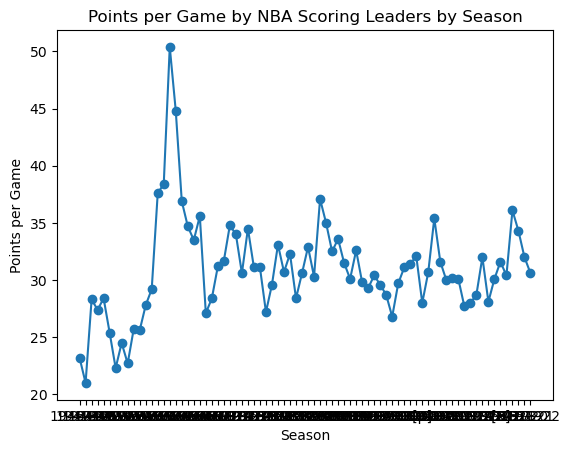

In [134]:
season_col = nba_scoring["Season"]
score_col = nba_scoring["Points per Game"]

plt.plot(season_col,score_col, marker='o')

plt.xlabel("Season")
plt.ylabel("Points per Game")

plt.title("Points per Game by NBA Scoring Leaders by Season")

### Insights:

From observing the line graph, I noticed that while there seemed to be a gradual increase in points per game as the seasons progressed, with a few outliers. The largest outlier occured in the 1961-62 season, when Wilt Chamberlain averaged 50.4 points per game.

### 2.2: Descriptive Statistics

I also wanted to see if there was a factor that tended to be displayed by the NBA scoring leaders. I decided look at the age of the scoring leaders. My first step for this was to find some descriptive statistics for the players' age.

In [147]:
age_col = nba_scoring["Age"]
age_col.describe()

count    76.000000
mean     25.986842
std       2.844848
min      21.000000
25%      24.000000
50%      26.000000
75%      28.000000
max      34.000000
Name: Age, dtype: float64

### Insights

I noticed that the mean age was around 26 years old, while the minimum and maxixum ages were 21 and 34 respectively.

### 2.3: Histogram

In order to better understand the relationshop between age and scoring titles, I decided to create a histogram showing the frequency of scoring titles by age.

Text(0.5, 1.0, 'Frequency of Scoring Titles by Age')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency of Scoring Titles')

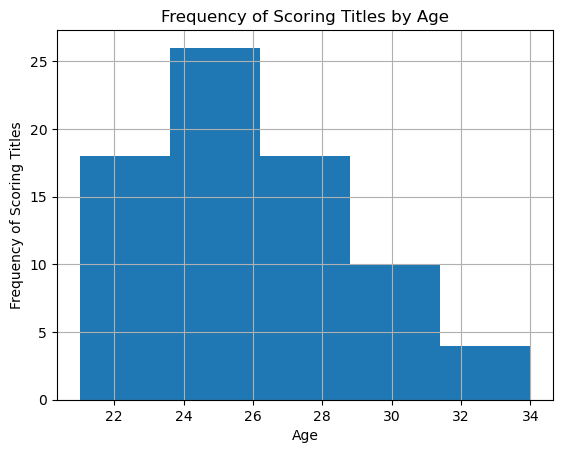

In [146]:
hist = nba_scoring["Age"].hist(bins=5)
plt.title('Frequency of Scoring Titles by Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Scoring Titles')

### Insights

From observing the histogram, I observed that the age group with the most socring titles is from 24-26 years old. With 5 bins, there is a right skew, meaning that the younger ages tend to have more scoring titles than the older ages.